# Data Input and Feature extraction

In [1]:
import os
import networkx as nx

def vertex_degree(free_tree):
    return [degree for node, degree in free_tree.degree()]

def avg_distance(free_tree):
    distances = dict(nx.all_pairs_shortest_path_length(free_tree))
    return [sum(distances[i].values()) / (len(free_tree) - 1) for i in range(1, len(free_tree) + 1)]

def is_center(free_tree):
    center_nodes = nx.center(free_tree)
    return [1 if i in center_nodes else 0 for i in range(len(free_tree))]

def is_centroidal(free_tree):
    tree_copy = free_tree.copy()

    while len(tree_copy) > 2:
        leaves = [node for node in tree_copy.nodes() if tree_copy.degree(node) == 1]

        tree_copy.remove_nodes_from(leaves)

    centroidal_nodes = list(tree_copy.nodes())
    return [1 if i in centroidal_nodes else 0 for i in range(len(free_tree))]

def betweenness_centrality(free_tree):
    betweenness = nx.betweenness_centrality(free_tree, normalized=True)
    return [betweenness[i] for i in range(1, len(free_tree) + 1)]

def closeness_centrality(free_tree):
    closeness = nx.closeness_centrality(free_tree)
    return [closeness[i] for i in range(1, len(free_tree) + 1)]

def eigenvector_centrality(free_tree):
    try:
        eigenvector = nx.eigenvector_centrality(free_tree, max_iter=1300)
        eigenvector_ordered = [eigenvector[i] for i in range(1, len(free_tree) + 1)]

    except nx.PowerIterationFailedConvergence:
        print(f"Warning: Eigenvector centrality calculation did not converge for a tree. Returning zeros.")
        eigenvector_ordered = [0.0] * len(free_tree)
    return eigenvector_ordered

def average_neighbor_degree(free_tree):
    and_values = []
    for node in free_tree.nodes():
        neighbors = list(free_tree.neighbors(node))
        if neighbors:
            neighbor_degrees = [free_tree.degree(neighbor) for neighbor in neighbors]
            and_values.append(sum(neighbor_degrees) / len(neighbors))
        else:
            and_values.append(0.0)
    return and_values

def eccentricity(free_tree):
    eccentricities = []
    distances = dict(nx.all_pairs_shortest_path_length(free_tree))
    for i in range(1, len(free_tree)+1):
        eccentricities.append(max(distances[i].values()))
    return eccentricities

import os
import networkx as nx

def vertex_degree(free_tree):
    return [degree for node, degree in free_tree.degree()]

def avg_distance(free_tree):
    distances = dict(nx.all_pairs_shortest_path_length(free_tree))
    return [sum(distances[i].values()) / (len(free_tree) - 1) for i in range(1, len(free_tree) + 1)]

def is_center(free_tree):
    center_nodes = nx.center(free_tree)
    return [1 if i in center_nodes else 0 for i in range(len(free_tree))]

def is_centroidal(free_tree):
    tree_copy = free_tree.copy()

    while len(tree_copy) > 2:
        leaves = [node for node in tree_copy.nodes() if tree_copy.degree(node) == 1]

        tree_copy.remove_nodes_from(leaves)

    centroidal_nodes = list(tree_copy.nodes())
    return [1 if i in centroidal_nodes else 0 for i in range(len(free_tree))]

def betweenness_centrality(free_tree):
    betweenness = nx.betweenness_centrality(free_tree, normalized=True)
    return [betweenness[i] for i in range(1, len(free_tree) + 1)]

def closeness_centrality(free_tree):
    closeness = nx.closeness_centrality(free_tree)
    return [closeness[i] for i in range(1, len(free_tree) + 1)]

def eigenvector_centrality(free_tree):
    try:
        eigenvector = nx.eigenvector_centrality(free_tree, max_iter=2500)
        eigenvector_ordered = [eigenvector[i] for i in range(1, len(free_tree) + 1)]

    except nx.PowerIterationFailedConvergence:
        print(f"Warning: Eigenvector centrality calculation did not converge for a tree. Returning zeros.")
        eigenvector_ordered = [0.0] * len(free_tree)
    return eigenvector_ordered

def average_neighbor_degree(free_tree):
    and_values = []
    for node in free_tree.nodes():
        neighbors = list(free_tree.neighbors(node))
        if neighbors:
            neighbor_degrees = [free_tree.degree(neighbor) for neighbor in neighbors]
            and_values.append(sum(neighbor_degrees) / len(neighbors))
        else:
            and_values.append(0.0)
    return and_values

def rootness_score(free_tree, root):
    n = len(free_tree)

    directed_tree = nx.bfs_tree(free_tree, root)
    successors = [len(nx.descendants(directed_tree, node)) for node in range(1, n + 1)]
    return [s / (n - 1) for s in successors]

def tree_diameter_feature(free_tree):
    diameter = nx.diameter(free_tree)

    endpoints = []
    for u in free_tree.nodes():
        for v in free_tree.nodes():
            if u < v:
                dist = nx.shortest_path_length(free_tree, source=u, target=v)
                if dist == diameter:
                    endpoints.append((u, v))

    diameter_paths = []
    for u, v in endpoints:
        diameter_paths.extend(nx.all_shortest_paths(free_tree, source=u, target=v))

    diameter_nodes = set()
    for path in diameter_paths:
        diameter_nodes.update(path)

    in_diameter = [1 if i+1 in diameter_nodes else 0 for i in range(len(free_tree))]

    return diameter, in_diameter

def radius(free_tree):
    return nx.radius(free_tree)

def is_in_center(free_tree):
    center_nodes = nx.center(free_tree)
    radius_val = nx.radius(free_tree)
    return radius_val

def wiener_index(free_tree):
    distances = dict(nx.all_pairs_shortest_path_length(free_tree))
    wiener = sum(sum(d.values()) for d in distances.values()) / 2
    return wiener

def rootness_score(free_tree, root):
    n = len(free_tree)

    directed_tree = nx.bfs_tree(free_tree, root)
    successors = [len(nx.descendants(directed_tree, node)) for node in range(1, n + 1)]
    return [s / (n - 1) for s in successors]

def extract_features(line):
    nums = line.strip().split(" ")
    pos = 1
    for num in nums:
        if int(num) == 0:
          root = pos
        pos += 1

    free_tree = nx.Graph()
    for i in range(1, len(nums) + 1):
        parent = int(nums[i - 1])
        if parent != 0:
            free_tree.add_edge(i, parent)

    diameter, in_diameter = tree_diameter_feature(free_tree)
    radius_val = is_in_center(free_tree)
    w_index = wiener_index(free_tree)

    return vertex_degree(free_tree), avg_distance(free_tree), is_center(free_tree), is_centroidal(free_tree), rootness_score(free_tree, root), len(nums), betweenness_centrality(free_tree), closeness_centrality(free_tree), eigenvector_centrality(free_tree), average_neighbor_degree(free_tree), eccentricity(free_tree), diameter, in_diameter, radius_val, w_index

folder_path = 'data/'
ml_matrix = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        with open(os.path.join(folder_path, filename), 'r') as file:
            for line in file:
                vrtx, avg, cntr, centroid, rootness, phrase_length, btw, closeness, eig, and_val, ecc, diameter, in_diameter, radius_val, w_index = extract_features(line)
                for i in range(len(vrtx)):
                    ml_matrix.append([vrtx[i], avg[i], cntr[i], centroid[i], phrase_length, btw[i], closeness[i], eig[i], and_val[i], ecc[i], diameter, in_diameter[i], radius_val, w_index, rootness[i]])

# Feature Exploration

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

data = np.array(ml_matrix)

y = data[:, 14]
X = np.delete(data, 14, axis=1)

column_names = ['vertex_degree', 'avg_distance', 'is_center', 'is_centroidal', 'phrase_length', "betweenness_centrality", "closeness_centrality", "eigenvector_centrality", "average_neighbor_degree", "eccentricity", "diameter", "in_diameter", "radius", "wiener_index", "target"]
df = pd.DataFrame(data, columns=column_names)

y = df['target']
X = df.drop('target', axis=1)
X_orig = df.drop('target', axis=1)

In [4]:
# Features to exclude
features_to_exclude = ['is_centroidal', 'average_neighbor_degree', 'diameter', 'radius', 'wiener_index', 'is_center', "eccentricity", "in_diameter", 'avg_distance', "closeness_centrality"]

X = X.drop(features_to_exclude, axis=1)

In [5]:
X_orig = X_orig.drop(features_to_exclude, axis=1)
df = df.drop(features_to_exclude, axis=1)

In [6]:
df.to_csv('pud_features_i_target.csv', index=False)

## Descriptive Statistics

In [7]:
print(X.describe())

       vertex_degree   avg_distance      is_center  is_centroidal  \
count  371321.000000  371321.000000  371321.000000  371321.000000   
mean        1.892815       3.691950       0.074765       0.074765   
std         1.296955       1.051328       0.263013       0.263013   
min         1.000000       1.000000       0.000000       0.000000   
25%         1.000000       2.944444       0.000000       0.000000   
50%         1.000000       3.600000       0.000000       0.000000   
75%         3.000000       4.333333       0.000000       0.000000   
max        14.000000      10.558824       1.000000       1.000000   

       phrase_length  betweenness_centrality  closeness_centrality  \
count  371321.000000           371321.000000         371321.000000   
mean       22.260737                0.146178              0.294866   
std         8.934124                0.221502              0.092301   
min         3.000000                0.000000              0.094708   
25%        16.000000        

## Distribution Analysis

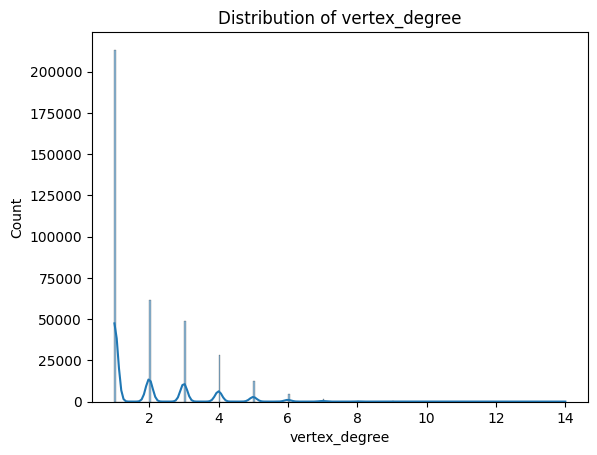

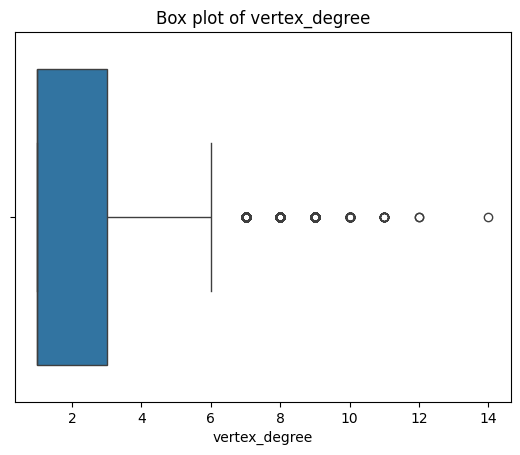

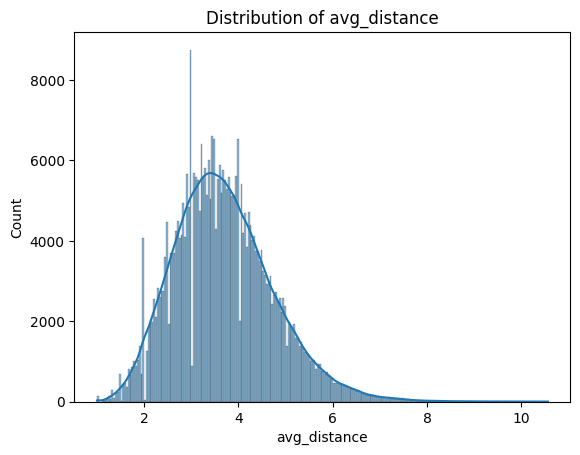

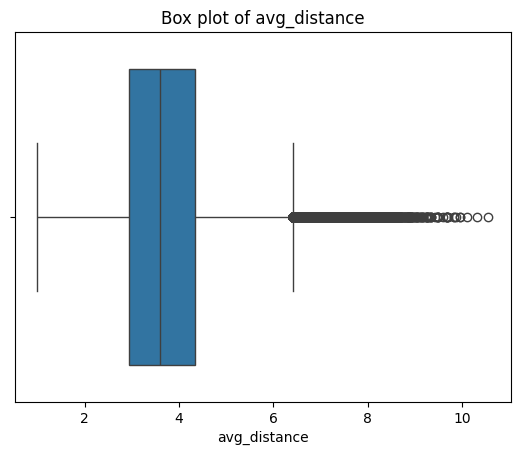

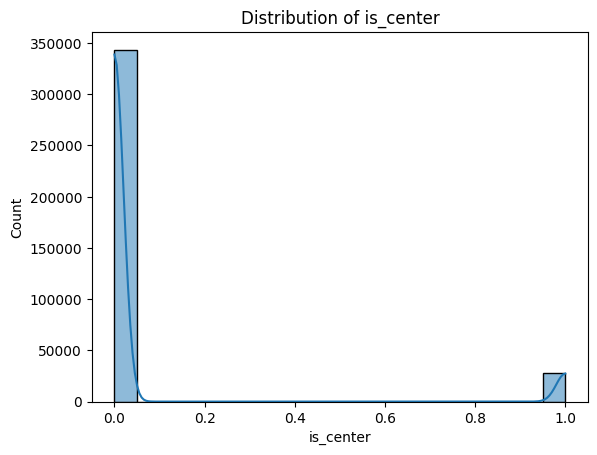

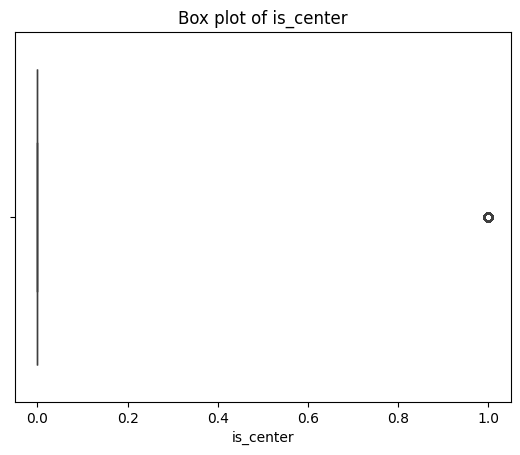

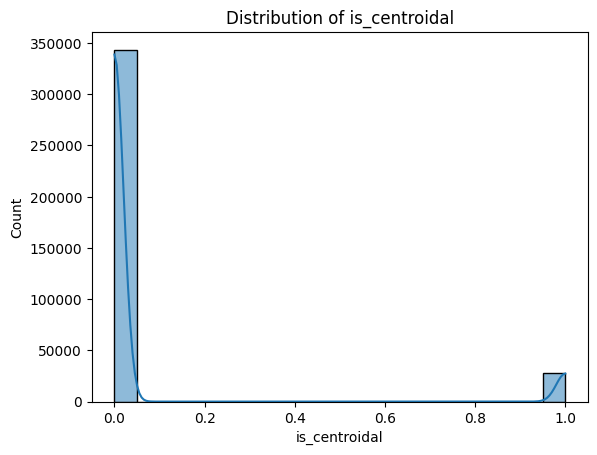

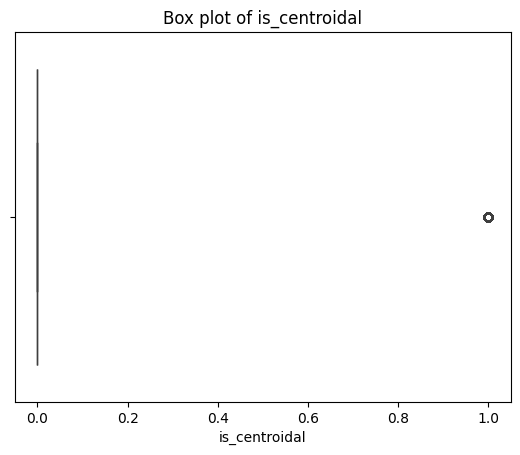

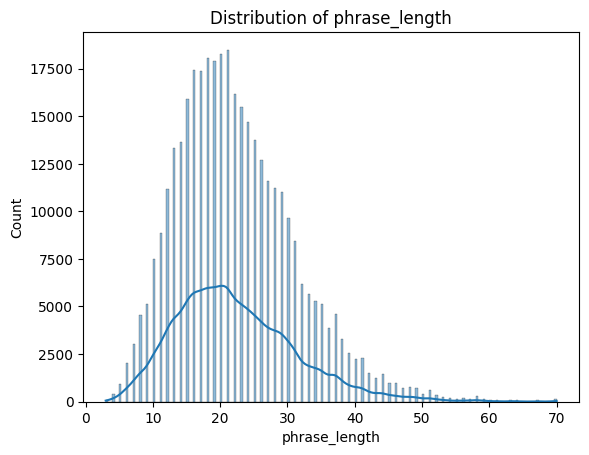

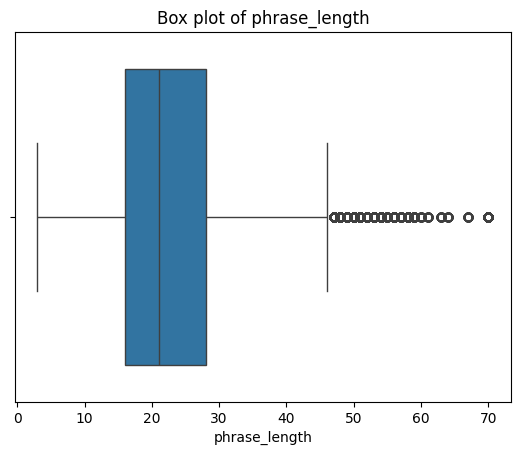

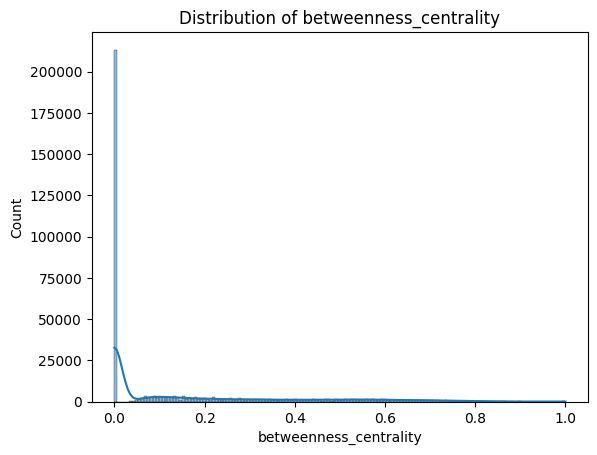

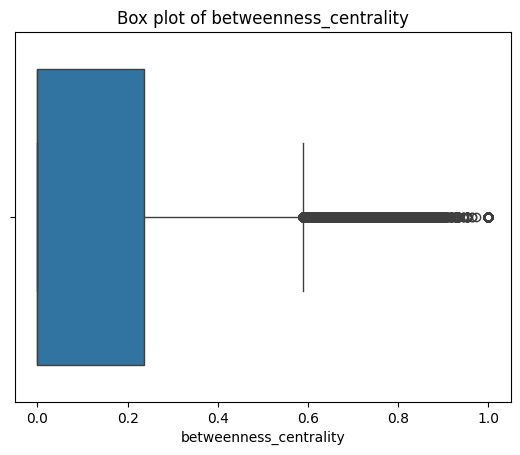

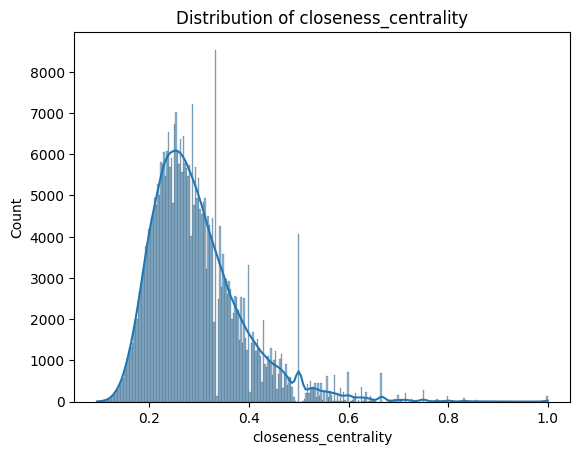

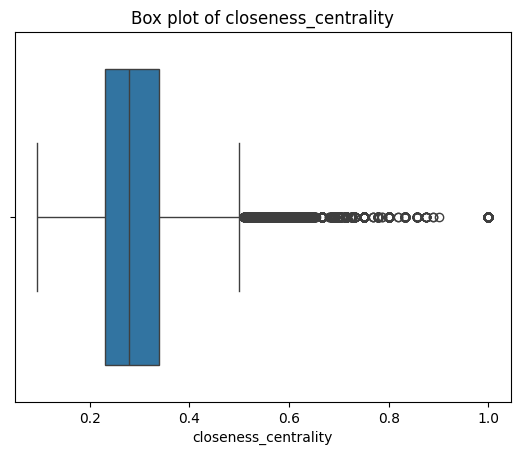

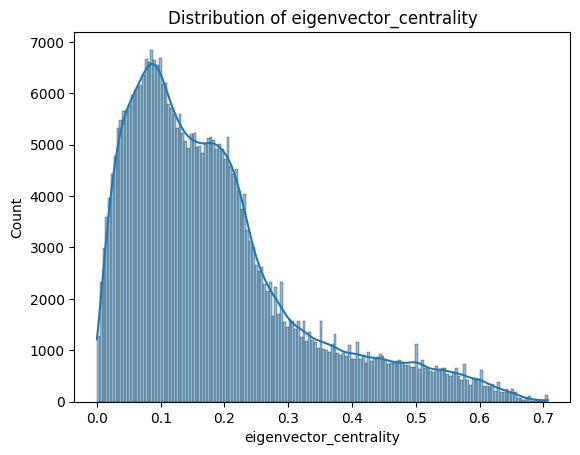

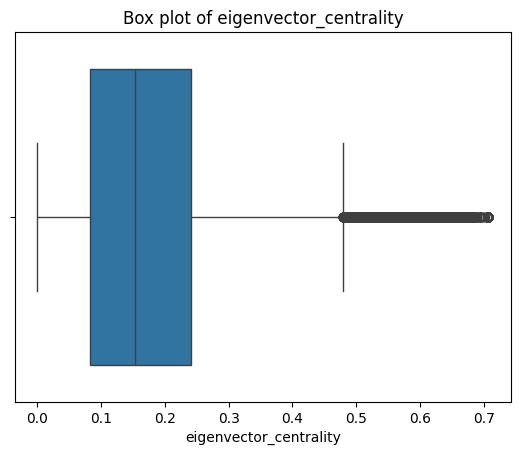

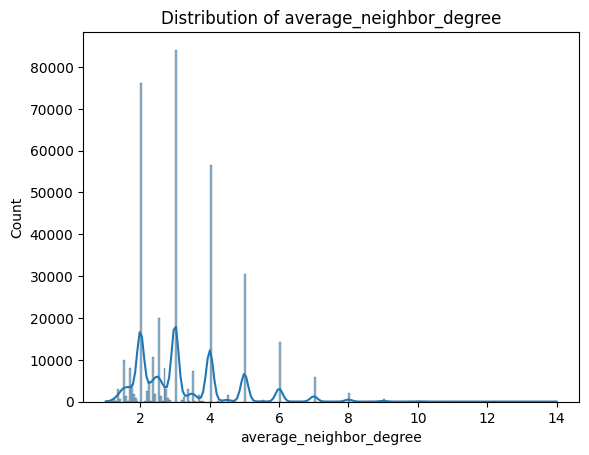

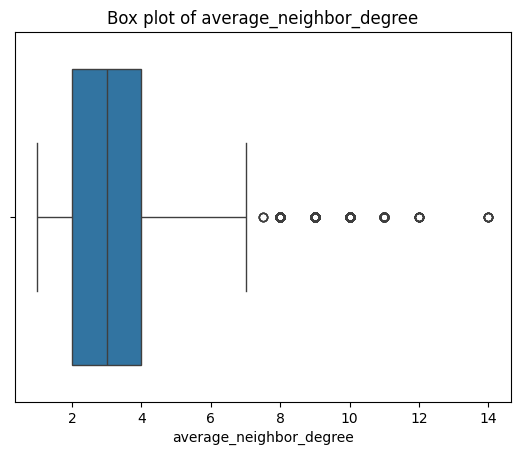

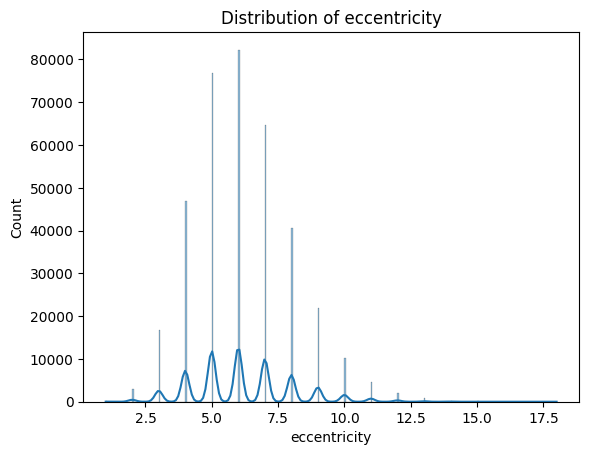

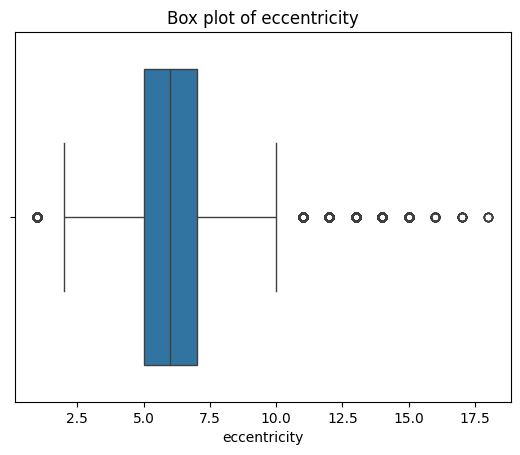

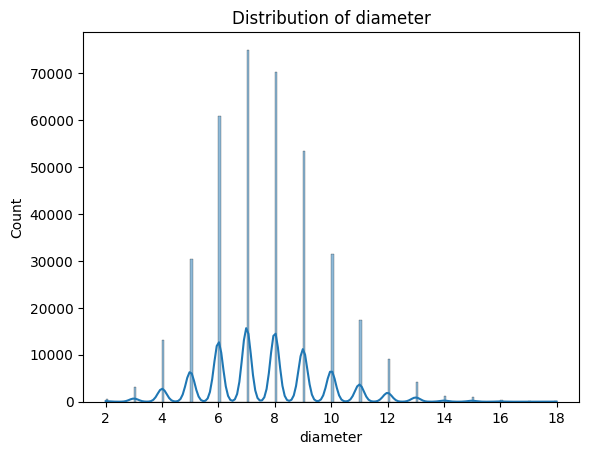

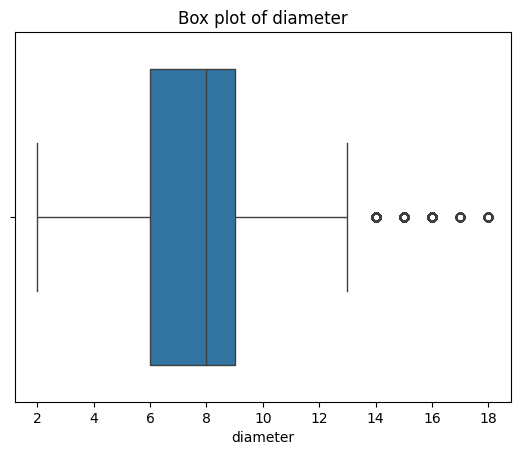

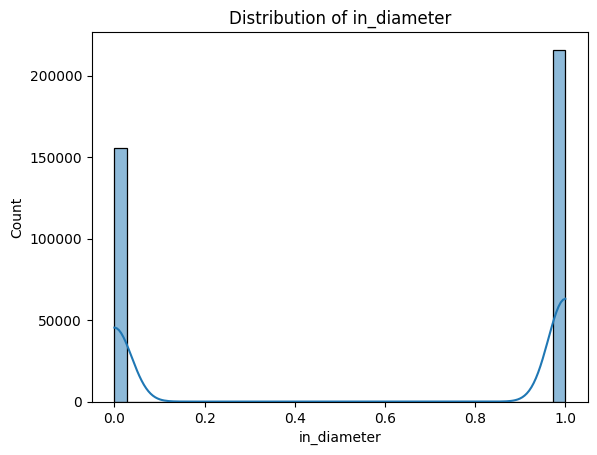

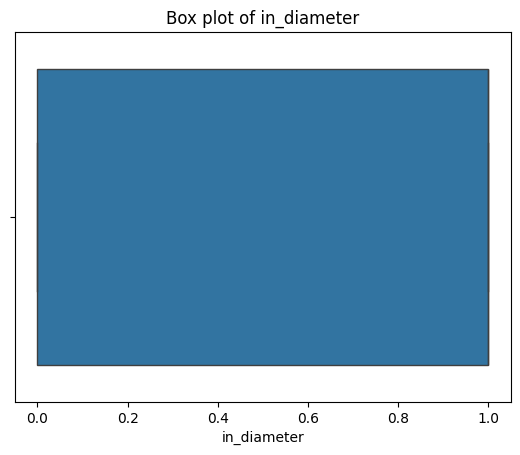

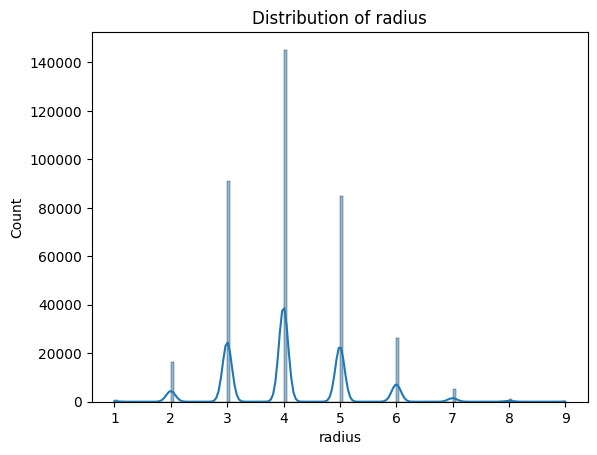

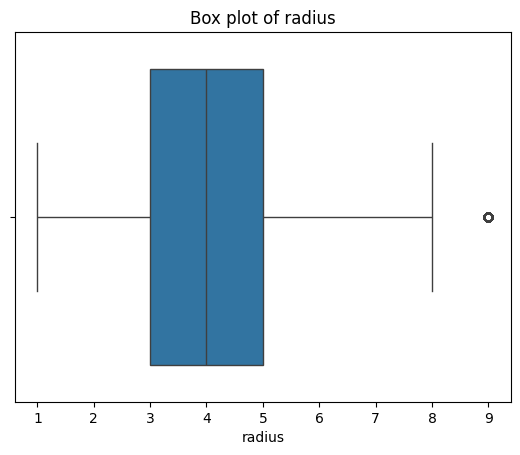

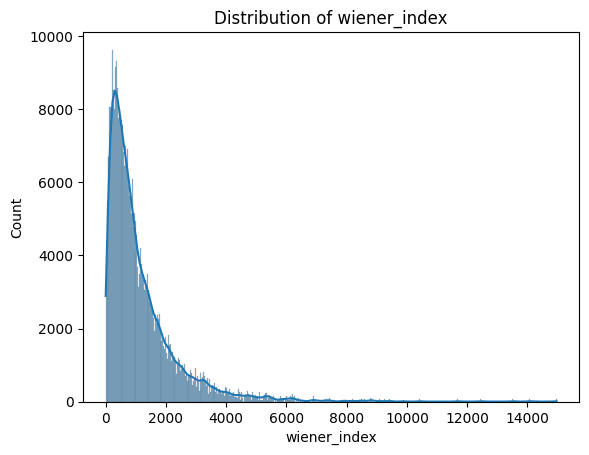

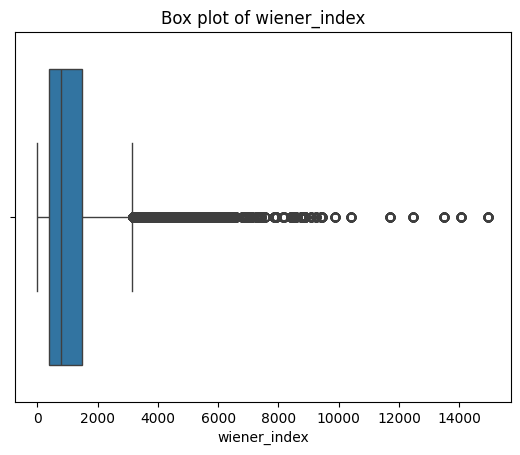

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in X.columns:
    plt.figure()
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure()
    sns.boxplot(x=X[col])
    plt.title(f'Box plot of {col}')
    plt.show()

## Target Variable Analysis

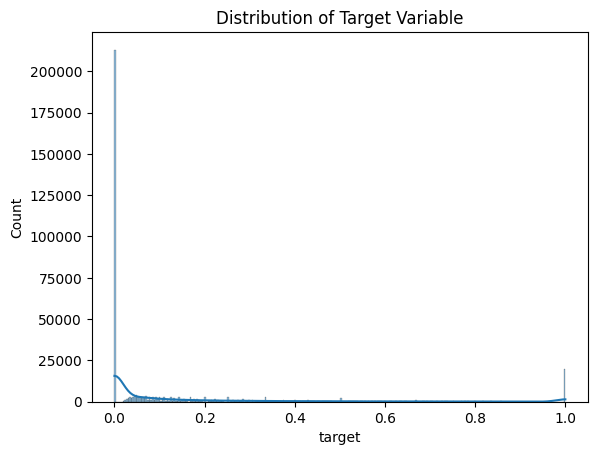

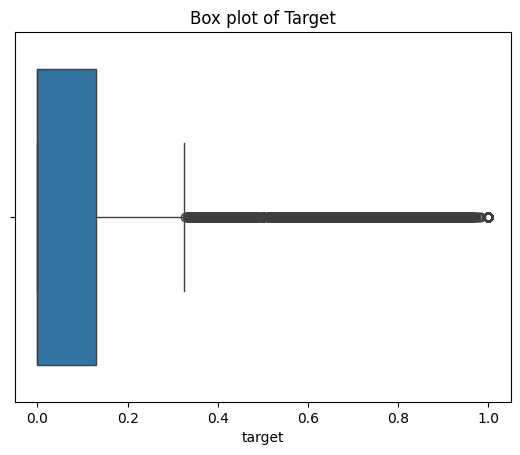

In [9]:
plt.figure()
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure()
sns.boxplot(x=y)
plt.title('Box plot of Target')
plt.show()

## Correlation Analysis

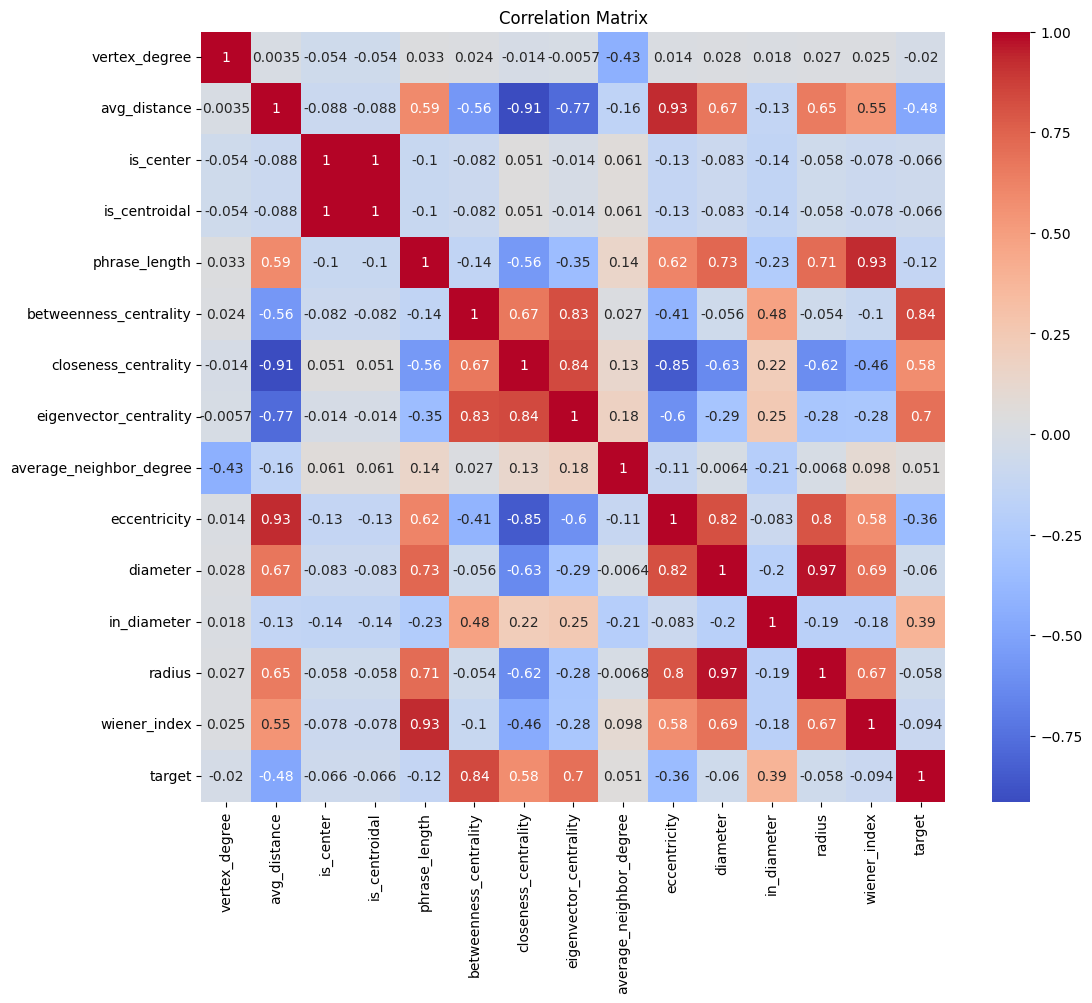

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Dimensionality Reduction

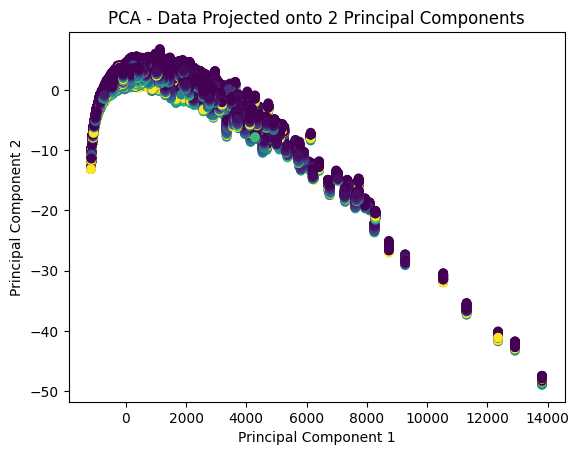

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Data Projected onto 2 Principal Components')
plt.show()

# Baseline "models"

## Random Baseline

In [ ]:
import random
from sklearn.base import clone as skclone
from sklearn.base import BaseEstimator

class RandomBaselineModel(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        num_samples = X.shape[0]
        y_pred = [random.uniform(0, 1) for _ in range(num_samples)]
        return y_pred

    def clone(self):
        return skclone(self)

## Normalized Degree Baseline

In [ ]:
class NormDegBaselineModel(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        y_pred = []
        for i in X.index:
            n = int(X_orig.loc[i, 'phrase_length'])
            degree = int(round((X.loc[i, 'vertex_degree'] * (n - 0)) + 0))
            prediction = (degree - 1) / (n - 1)
            y_pred.append(prediction)
        return y_pred

    def clone(self):
        return skclone(self)

## Linear Regression

### "Basic" Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

class LinearRegressionModel:
    _model = None

    def __init__(self):
        if self._model == None:
            self._model = LinearRegression()

    def fit(self, X, y):
        return self._model.fit(X, y)

    def predict(self, X):
        return self._model.predict(X)

    def clone(self):
        return skclone(self._model)

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

class RidgeRegressionModel:
    _model = None
    _best_alpha = None

    def __init__(self, alphas=[0.01, 0.1, 1, 10, 100]):
        if self._model == None:
            self._model = Ridge()
            self.alphas = alphas
            self._grid_search = None

    def fit(self, X, y):
        self._grid_search = GridSearchCV(self._model, param_grid={'alpha': self.alphas}, cv=5, scoring='neg_mean_squared_error')
        self._grid_search.fit(X, y)
        self._model = self._grid_search.best_estimator_
        self._best_alpha = self._model.alpha
        return self._model

    def predict(self, X):
        return self._model.predict(X)

    def get_best_alpha(self):
        return self._best_alpha

    def clone(self):
        return skclone(self._model)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

class LassoRegressionModel:
    _model = None
    _best_alpha = None

    def __init__(self, alphas=[0.01, 0.1, 1, 10, 100]):
        if self._model == None:
            self._model = Lasso()
            self.alphas = alphas
            self._grid_search = None

    def fit(self, X, y):
        self._grid_search = GridSearchCV(self._model, param_grid={'alpha': self.alphas}, cv=5, scoring='neg_mean_squared_error')
        self._grid_search.fit(X, y)
        self._model = self._grid_search.best_estimator_
        self._best_alpha = self._model.alpha
        return self._model

    def predict(self, X):
        return self._model.predict(X)

    def get_best_alpha(self):
        return self._best_alpha

    def clone(self):
        return skclone(self._model)

### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

class ElasticNetRegressionModel:
    _model = None
    _best_alpha = None
    _best_l1_ratio = None

    def __init__(self, alphas=[0.01, 0.1, 1, 10, 100], l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9]):
        if self._model == None:
            self._model = ElasticNet()
            self.alphas = alphas
            self.l1_ratios = l1_ratios
            self._grid_search = None

    def fit(self, X, y):
        self._grid_search = GridSearchCV(self._model, param_grid={'alpha': self.alphas, 'l1_ratio': self.l1_ratios}, cv=5, scoring='neg_mean_squared_error')
        self._grid_search.fit(X, y)
        self._model = self._grid_search.best_estimator_
        self._best_alpha = self._model.alpha
        self._best_l1_ratio = self._model.l1_ratio
        return self._model

    def predict(self, X):
        return self._model.predict(X)

    def get_best_alpha(self):
        return self._best_alpha

    def get_best_l1_ratio(self):
        return self._best_l1_ratio

    def clone(self):
        return skclone(self._model)

# Our Contendent Models


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

class DecisionTreeRegressionModel:
    _model = None
    _best_params = None

    def __init__(self, max_depths=[None, 5, 10, 15], min_samples_splits=[2, 5, 10], min_samples_leafs=[1, 2, 4]):
        if self._model == None:
            self._model = DecisionTreeRegressor()
            self.max_depths = max_depths
            self.min_samples_splits = min_samples_splits
            self.min_samples_leafs = min_samples_leafs
            self._grid_search = None

    def fit(self, X, y):
        self._grid_search = GridSearchCV(self._model, param_grid={'max_depth': self.max_depths, 'min_samples_split': self.min_samples_splits, 'min_samples_leaf': self.min_samples_leafs}, cv=5, scoring='neg_mean_squared_error')
        self._grid_search.fit(X, y)
        self._model = self._grid_search.best_estimator_
        self._best_params = self._grid_search.best_params_
        return self._model

    def predict(self, X):
        return self._model.predict(X)

    def get_best_params(self):
        return self._best_params

    def clone(self):
        return skclone(self._model)

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

class RandomForestRegressionModel:
    def __init__(self, n_estimators=[50, 100, 200], max_depths=[None, 10, 20], min_samples_splits=[2, 5, 10]):
            self._model = RandomForestRegressor()
            self.n_estimators = n_estimators
            self.max_depths = max_depths
            self.min_samples_splits = min_samples_splits
            self._grid_search = None
            self._best_params = None

    def fit(self, X, y):
        param_grid = {
            'n_estimators': self.n_estimators + [300, 500],
            'max_depth': self.max_depths + [5, 15, 25, 30],
            'min_samples_split': self.min_samples_splits + [15, 20],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2'],
            'bootstrap': [True, False],
            'criterion': ['mse', 'mae']
        }
        self._grid_search = GridSearchCV(self._model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1) # add verbose and n_jobs
        self._grid_search.fit(X, y)
        self._model = self._grid_search.best_estimator_
        self._best_params = self._grid_search.best_params_
        return self._model

    def predict(self, X):
        return self._model.predict(X)

    def get_best_params(self):
        return self._best_params

    def clone(self):
        return clone(self._model)

## Gradient Boosting Machine

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.base import clone as skclone
import numpy as np

class XGBoostRegressionModel:
    _model = None
    _best_params = None

    def __init__(self, n_estimators=[50, 100, 200], learning_rates=[0.01, 0.1, 0.2], max_depths=[3, 5, 7, 9, 11],
                 subsample=[0.6, 0.7, 0.8, 0.9, 1.0], colsample_bytree=[0.6, 0.7, 0.8, 0.9, 1.0],
                 colsample_bylevel=[0.6, 0.7, 0.8, 0.9, 1.0], colsample_bynode=[0.6, 0.7, 0.8, 0.9, 1.0],
                 gamma=[0, 0.1, 0.2, 0.3, 0.4], min_child_weight=[1, 3, 5, 7],
                 reg_alpha=[0, 0.001, 0.01, 0.1, 1], reg_lambda=[0, 0.001, 0.01, 0.1, 1],
                 random_state=42, n_iter=50, cv=10):
        if self._model == None:
            self._model = xgb.XGBRegressor(random_state=random_state)
            self.n_estimators = n_estimators
            self.learning_rates = learning_rates
            self.max_depths = max_depths
            self.subsample = subsample
            self.colsample_bytree = colsample_bytree
            self.colsample_bylevel = colsample_bylevel
            self.colsample_bynode = colsample_bynode
            self.gamma = gamma
            self.min_child_weight = min_child_weight
            self.reg_alpha = reg_alpha
            self.reg_lambda = reg_lambda
            self.random_state = random_state
            self.n_iter = n_iter
            self.cv = cv
            self._random_search = None
            self._grid_search = None

    def fit(self, X, y, early_stopping_rounds=10):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=self.random_state)
        eval_set = [(X_val, y_val)]

        param_dist = {
            'n_estimators': self.n_estimators,
            'learning_rate': self.learning_rates,
            'max_depth': self.max_depths,
            'subsample': self.subsample,
            'colsample_bytree': self.colsample_bytree,
            'colsample_bylevel': self.colsample_bylevel,
            'colsample_bynode': self.colsample_bynode,
            'gamma': self.gamma,
            'min_child_weight': self.min_child_weight,
            'reg_alpha': self.reg_alpha,
            'reg_lambda': self.reg_lambda
        }

        self._random_search = RandomizedSearchCV(
            self._model, param_distributions=param_dist, n_iter=self.n_iter,
            cv=self.cv, scoring='neg_root_mean_squared_error', random_state=self.random_state, n_jobs=-1
        )

        self._random_search.fit(X_train, y_train, eval_set=eval_set,
                                eval_metric="rmse", early_stopping_rounds=early_stopping_rounds, verbose=False)
        self._model = self._random_search.best_estimator_
        self._best_params = self._random_search.best_params_
        print(f"Best parameters from RandomizedSearchCV: {self._best_params}")

        return self._model

    def refine_fit(self, X, y, early_stopping_rounds=5):
        if self._best_params is None:
            raise ValueError("Must run fit() before refine_fit()")

        print("Starting fine-tuning with GridSearchCV...")
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=self.random_state)
        eval_set = [(X_val, y_val)]

        param_grid = {
            'n_estimators': [int(self._best_params['n_estimators'] * 0.9), self._best_params['n_estimators'], int(self._best_params['n_estimators'] * 1.1)],
            'learning_rate': [self._best_params['learning_rate'] * 0.9, self._best_params['learning_rate'], self._best_params['learning_rate'] * 1.1],
            'max_depth': [max(1, self._best_params['max_depth'] - 1), self._best_params['max_depth'], self._best_params['max_depth'] + 1],
            'subsample': [max(0.5, self._best_params['subsample'] - 0.1), self._best_params['subsample'], min(1.0, self._best_params['subsample'] + 0.1)],
            'colsample_bytree': [max(0.5, self._best_params['colsample_bytree'] - 0.1), self._best_params['colsample_bytree'], min(1.0, self._best_params['colsample_bytree'] + 0.1)],
            'colsample_bylevel': [max(0.5, self._best_params['colsample_bylevel'] - 0.1), self._best_params['colsample_bylevel'], min(1.0, self._best_params['colsample_bylevel'] + 0.1)],
            'colsample_bynode': [max(0.5, self._best_params['colsample_bynode'] - 0.1), self._best_params['colsample_bynode'], min(1.0, self._best_params['colsample_bynode'] + 0.1)],
            'gamma': [max(0, self._best_params['gamma'] - 0.1), self._best_params['gamma'], self._best_params['gamma'] + 0.1],
            'min_child_weight': [max(1, self._best_params['min_child_weight'] - 1), self._best_params['min_child_weight'], self._best_params['min_child_weight'] + 1],
            'reg_alpha': [self._best_params['reg_alpha'] * 0.9, self._best_params['reg_alpha'], self._best_params['reg_alpha'] * 1.1],
            'reg_lambda': [self._best_params['reg_lambda'] * 0.9, self._best_params['reg_lambda'], self._best_params['reg_lambda'] * 1.1],
        }
        param_grid = {k: v for k, v in param_grid.items() if k in self._best_params}

        for param, values in param_grid.items():
            if param in ['n_estimators', 'max_depth', 'min_child_weight']:
                param_grid[param] = [int(v) for v in values if v >= 1]
                param_grid[param] = sorted(list(set(param_grid[param])))
            elif param in ['learning_rate', 'subsample', 'colsample_bytree', 'colsample_bylevel', 'colsample_bynode', 'gamma', 'reg_alpha', 'reg_lambda']:
                param_grid[param] = [v for v in values if v >= 0]
                param_grid[param] = sorted(list(set(param_grid[param])))
            if not param_grid[param]:
                del param_grid[param]

        self._grid_search = GridSearchCV(
            self._model, param_grid=param_grid,
            cv=self.cv, scoring='neg_root_mean_squared_error', n_jobs=-1
        )
        self._grid_search.fit(X_train, y_train, eval_set=eval_set,
                                eval_metric="rmse", early_stopping_rounds=early_stopping_rounds, verbose=False)
        self._model = self._grid_search.best_estimator_
        self._best_params.update(self._grid_search.best_params_)
        print(f"Best parameters after fine-tuning with GridSearchCV: {self._grid_search.best_params_}")

        return self._model

    def predict(self, X):
        if self._model is None:
            raise Exception("Model has not been trained yet. Call fit() before predict().")
        return self._model.predict(X)

    def get_best_params(self):
        if self._best_params is None:
            raise Exception("Model has not been trained yet. Call fit() before get_best_params().")
        return self._best_params

    def clone(self):
        return skclone(self._model)

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

class GMMRegressionModel:
    _model = None
    _best_params = None

    def __init__(self, n_components_options=[2, 3, 4, 5, 6, 7], covariance_types=['full', 'tied', 'diag', 'spherical'], max_iter_options=[100, 200]):
        if self._model is None:
            self._model = GaussianMixture()
        self.n_components_options = n_components_options
        self.covariance_types = covariance_types
        self.max_iter_options = max_iter_options
        self._grid_search = None

    def fit(self, X, y):
        Xy = np.column_stack((X, y))

        self._grid_search = GridSearchCV(
            self._model,
            param_grid={
                'n_components': self.n_components_options,
                'covariance_type': self.covariance_types,
                'max_iter': self.max_iter_options
            },
            cv=5,
            scoring='neg_mean_squared_error'
        )
        self._grid_search.fit(Xy)

        self._model = self._grid_search.best_estimator_
        self._best_params = self._grid_search.best_params_

        return self._model

    def predict(self, X):
        component_labels = self._model.predict(np.column_stack((X, np.zeros(X.shape[0]))))

        means = self._model.means_
        weights = self._model.weights_

        y_pred = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
          component_label = component_labels[i]
          y_pred[i] = means[component_label, -1]

        return y_pred

    def get_best_params(self):
        return self._best_params

    def clone(self):
        return skclone(self._model)

# Model Selection
Select a model to continue:

In [ ]:
model = RandomBaselineModel()

In [ ]:
model = NormDegBaselineModel()

In [ ]:
model = LinearRegressionModel()

In [ ]:
model = RidgeRegressionModel()

In [ ]:
model = LassoRegressionModel()

In [ ]:
model = ElasticNetRegressionModel()

In [ ]:
model = DecisionTreeRegressionModel()

In [ ]:
model = RandomForestRegressionModel()

In [ ]:
model = XGBoostRegressionModel()

In [ ]:
model = GMMRegressionModel()

# K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler, PowerTransformer
import numpy as np

def kfold_cross_validation(X, y, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = []
    r2_scores = []
    fold = 1
    for train_index, val_index in kf.split(X):
        print("We are by the fold:", fold,"/",k)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()

        if isinstance(model, GMMRegressionModel):
            pt = PowerTransformer(method='yeo-johnson')
            cols_to_transform = [X_train.columns[i] for i in (list(range(4)))]
            X_train_scaled.loc[:, cols_to_transform] = pt.fit_transform(X_train.loc[:, cols_to_transform])
            X_val_scaled.loc[:, cols_to_transform] = pt.transform(X_val.loc[:, cols_to_transform])

        scaler = RobustScaler()
        #cols_to_scale = list(range(1)) + list(range(3, 10)) + list(range(14, 15))
        cols_to_scale = list(range(4))

        X_train_scaled.loc[:, X_train_scaled.columns[cols_to_scale]] = scaler.fit_transform(X_train.loc[:, X_train_scaled.columns[cols_to_scale]])
        X_val_scaled.loc[:, X_val_scaled.columns[cols_to_scale]] = scaler.transform(X_val.loc[:, X_val_scaled.columns[cols_to_scale]])

        # Clone the model to ensure a fresh model for each fold
        fold_model = model.clone()

        fold_model.fit(X_train_scaled, y_train)

        y_pred = fold_model.predict(X_val_scaled)

        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        fold += 1

    return {
        "mse": mse_scores,
        "r2": r2_scores
    }

# Execution & Evaluation

In [ ]:
scores = kfold_cross_validation(X, y, k=10)
print("K-Fold Cross-Validation Scores:")
print("  MSE:", scores["mse"])
print("  Average MSE:", np.mean(scores["mse"]))
print("  R-squared:", scores["r2"])
print("  Average R-squared:", np.mean(scores["r2"]))

We are by the fold: 1 / 10
We are by the fold: 2 / 10
We are by the fold: 3 / 10
We are by the fold: 4 / 10
We are by the fold: 5 / 10
We are by the fold: 6 / 10
We are by the fold: 7 / 10
We are by the fold: 8 / 10
We are by the fold: 9 / 10
We are by the fold: 10 / 10
K-Fold Cross-Validation Scores:
  MSE: [0.016269463163655636, 0.018662309366714827, 0.020718215606420225, 0.017548215232068207, 0.0195228325449886, 0.01844886297719888, 0.019443899085791628, 0.021861017916205594, 0.01669148089761707, 0.01680006957141909]
  Average MSE: 0.018596636636207975
  R-squared: [0.722597581713361, 0.7141985128826911, 0.695696645210631, 0.7126707444757255, 0.6874852517358432, 0.6737763816214566, 0.6698472993625857, 0.6694153172686468, 0.6986983626628978, 0.7141791771306716]
  Average R-squared: 0.6958565274064511
